In [251]:
# https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough#train_the_model

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=3)

In [142]:
# Download the data

train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\Ian\.keras\datasets\iris_training.csv


In [203]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

unpacked_train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size=32,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

features, labels = next(iter(unpacked_train_dataset))

(features, labels)

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


(OrderedDict([('sepal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([5.1, 5.3, 5. , 6.5, 6.8, 7.2, 5. , 4.4, 5.7, 6.9, 6.6, 6.8, 7.7,
                      4.8, 6.7, 6.3, 7.3, 5.4, 6.4, 4.5, 5.4, 6.7, 5. , 7.7, 5.8, 4.9,
                      4.7, 4.4, 6.9, 6. , 5.8, 6.1], dtype=float32)>),
              ('sepal_width',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([3.5, 3.7, 3. , 3. , 3. , 3. , 2. , 2.9, 2.8, 3.1, 2.9, 3.2, 3. ,
                      3. , 3.1, 2.3, 2.9, 3.4, 2.7, 2.3, 3.9, 3.1, 3.3, 2.8, 4. , 3. ,
                      3.2, 3.2, 3.2, 3. , 2.7, 2.6], dtype=float32)>),
              ('petal_length',
               <tf.Tensor: shape=(32,), dtype=float32, numpy=
               array([1.4, 1.5, 1.6, 5.5, 5.5, 5.8, 3.5, 1.4, 4.5, 4.9, 4.6, 5.9, 6.1,
                      1.4, 5.6, 4.4, 6.3, 1.5, 5.3, 1.3, 1.3, 4.4, 1.4, 6.7, 1.2, 1.4,
                      1.3, 1.3, 5.7, 4.8, 5.1, 5.6], dtype

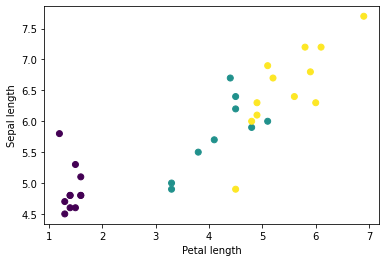

In [144]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [152]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [209]:
train_dataset = unpacked_train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))
print(next(iter(train_dataset)))

(<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[4.9, 3.1, 1.5, 0.1],
       [6.1, 3. , 4.9, 1.8],
       [5. , 2.3, 3.3, 1. ],
       [7.6, 3. , 6.6, 2.1],
       [5. , 3.5, 1.3, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [6.5, 3. , 5.2, 2. ],
       [6.9, 3.1, 4.9, 1.5],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [5. , 3. , 1.6, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 3.3, 5.7, 2.1],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 5.1, 1.8],
       [6.4, 3.2, 4.5, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 3.4, 1.6, 0.4],
       [6.6, 2.9, 4.6, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5.2, 2.3],
       [7.2, 3.6, 6.1, 2.5],
       [7.7, 3.8, 6.7, 2.2],
       [5.8, 2.7, 4.1, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 2.9, 4.2, 1.3]], dtype=float32)>, <tf.

In [252]:

class MyModel(tf.keras.Model):
    def __init__(self, **kw):
        super().__init__(**kw)
        
    def build(self, input_shape):
        self._layers = [
            tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=input_shape),
            tf.keras.layers.Dense(10, activation=tf.nn.relu),
            tf.keras.layers.Dense(3),
        ]
        
    def call(self, inputs):
        r = inputs
        for layer in self._layers:
            r = layer(r)
        return r
    
model = MyModel()


predictions = model(features)

# Predictions are logits at this point. Convert to probabilities:
predictions = tf.nn.softmax(predictions)

print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))
        

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [2 2 0 2 2 0 0 0 2 2 2 1 0 1 1 2 0 0 1 0 2 1 2 1 0 0 0 0 0 1 2 0]


In [235]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y):
    return loss_object(y_true=y, y_pred=model(x))

l = loss_object(labels, model(features))
print("Loss test: {}".format(l))

Loss test: 1.439521074295044


In [238]:
def grad(model, features, labels):
    with tf.GradientTape() as tape:
        current_loss = loss_object(labels, model(features))
        
    return current_loss, tape.gradient(current_loss, model.trainable_variables)

In [618]:

model = MyModel()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_value, grads = grad(model, features, labels)

print(f"Step: {optimizer.iterations.numpy()}, Initial Loss: {loss_value.numpy()}")

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.2050299644470215
Step: 1,         Loss: 1.1501548290252686


Epoch: 0,	Loss: 1.16	Accuracy: 35.000%
Epoch: 50,	Loss: 0.541	Accuracy: 78.333%
Epoch: 100,	Loss: 0.401	Accuracy: 86.667%
Epoch: 150,	Loss: 0.305	Accuracy: 95.000%
Epoch: 200,	Loss: 0.187	Accuracy: 96.667%


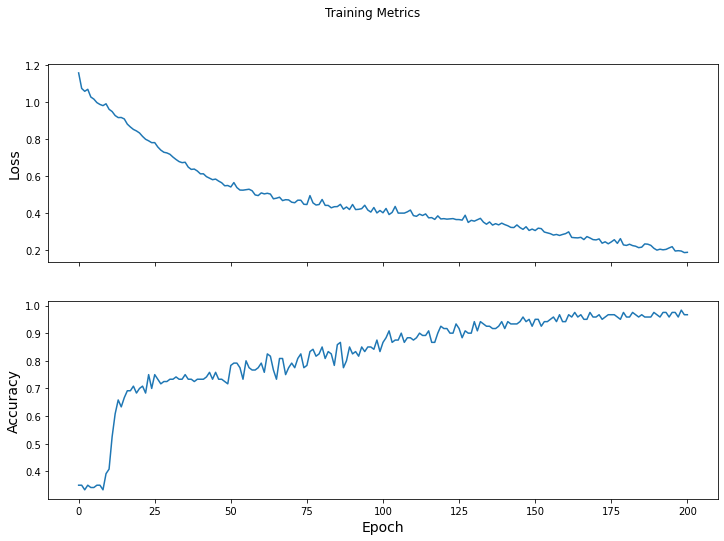

In [649]:

model = MyModel()

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for features, labels in train_dataset:
        current_loss, grads = grad(model, features, labels)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg.update_state(current_loss)
        epoch_accuracy.update_state(labels, model(features))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
        
    if epoch % 50 == 0:
        print(f"Epoch: {epoch},\tLoss: {epoch_loss_avg.result():.3}\tAccuracy: {epoch_accuracy.result():.3%}")
        
        
def plot_training_results(train_loss_results, train_accuracy_results):
    fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
    fig.suptitle('Training Metrics')

    axes[0].set_ylabel("Loss", fontsize=14)
    axes[0].plot(train_loss_results)

    axes[1].set_ylabel("Accuracy", fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].plot(train_accuracy_results)
    plt.show()
    
plot_training_results(train_loss_results, train_accuracy_results)

In [629]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)


8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [632]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size=32,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [635]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    # training=False is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [637]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.0%)
Example 1 prediction: Iris versicolor (73.4%)
Example 2 prediction: Iris virginica (86.5%)


Epoch: 0   , Loss: 1.603, Accuracy: 14.167%
Epoch: 50  , Loss: 0.441, Accuracy: 77.500%
Epoch: 100 , Loss: 0.264, Accuracy: 96.667%
Epoch: 150 , Loss: 0.168, Accuracy: 97.500%


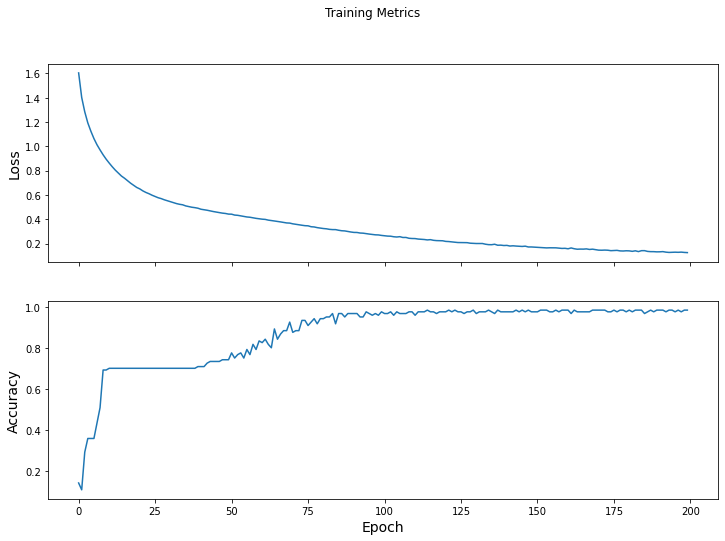

In [791]:
# Now with Keras things

class QuietLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0:
            print(f"Epoch: {epoch:<4}, Loss: {logs['loss']:.03f}, Accuracy: {logs['accuracy']:.03%}")

    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

h = model.fit(train_dataset, epochs=200, verbose=0, callbacks=[QuietLogger()])

plot_training_results(h.history['loss'], h.history['accuracy'])

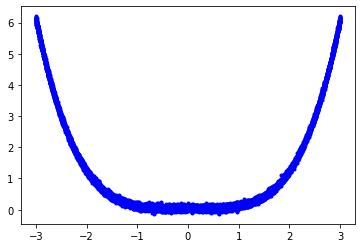

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-3., -3., -3., -3.], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=6.1161222>)
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.999, -2.999, -2.999, -2.999], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=6.10039>)
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.999, -2.999, -2.999, -2.999], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=6.1559095>)
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.998, -2.998, -2.998, -2.998], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=6.195367>)
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.998, -2.998, -2.998, -2.998], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=6.113937>)


In [988]:
# Now try using this NN to fit basic functions

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 10200

# A vector of random x values
x = tf.linspace(-3.,3.,NUM_EXAMPLES)# tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
x1,x2 = tf.split(x,2)
noise1,noise2 = tf.split(noise,2)
y1 = x1 * TRUE_W + TRUE_B + noise1
y2 = x2 * TRUE_W + TRUE_B + noise2

y = x * TRUE_W + TRUE_B + noise

y = (TRUE_W * x**4 + TRUE_B + noise*2) / 40.0

# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b", marker='.')
plt.show()

dataset = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices(x).map(lambda i: tf.repeat(i,4)),
    tf.data.Dataset.from_tensor_slices(y),
))

for d in dataset.take(5):
    print(d)

# Batch it so each step uses multiple data points. Also, the Keras optimizer and loss function can't cope with scalar dataset elements (https://www.tensorflow.org/api_docs/python/tf/data/Dataset#common_terms_2)

dataset = dataset.shuffle(NUM_EXAMPLES).batch(32).cache()

Epoch: 0   , Loss: 0.634, Mean Absolute Error: 0.628
Epoch: 50  , Loss: 0.005, Mean Absolute Error: 0.053
Epoch: 100 , Loss: 0.004, Mean Absolute Error: 0.0494
Epoch: 150 , Loss: 0.004, Mean Absolute Error: 0.0478
Epoch: 200 , Loss: 0.004, Mean Absolute Error: 0.0466


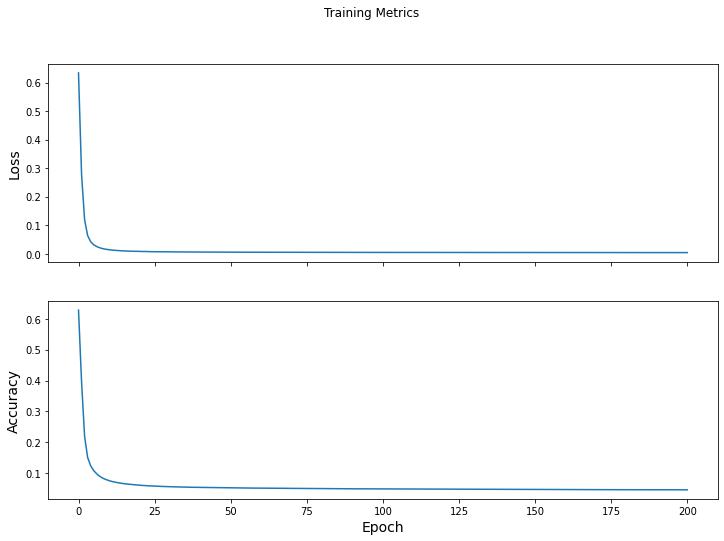

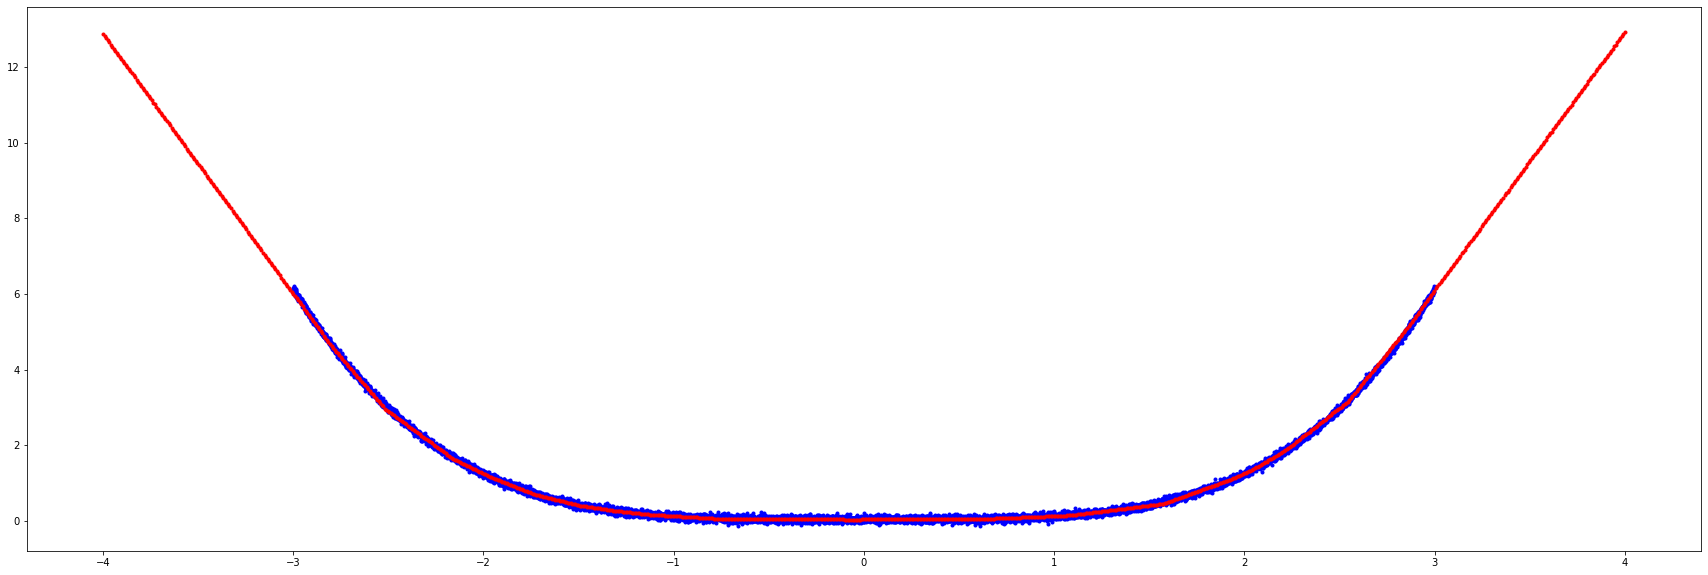

In [990]:

class QuietLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0:
            print(f"Epoch: {epoch:<4}, Loss: {logs['loss']:.03f}, Mean Absolute Error: {logs['mae']:.03}")

with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(1),
    ])


    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        loss=tf.keras.losses.mean_squared_error,
        metrics=['mae', 'accuracy']
    )

    h = model.fit(dataset, epochs=201, verbose=0, callbacks=[QuietLogger()])

plot_training_results(h.history['loss'], h.history['mae'])

plt.figure(figsize=(30,10))
plt.scatter(x, y, c="b", marker='.')

test_x = tf.linspace(-4,4,1000)
test_y = model(tf.stack([tf.repeat(_x, 4) for _x in test_x]))

plt.scatter(test_x, test_y, c="r", marker='.')
plt.show()